<a href="https://colab.research.google.com/github/kleczekr/tolkenizer/blob/master/violence10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

In [2]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
# This cell is meant to accommodate the Google Colab way of dealing with reading 
# files from Google Drive; feel free to ignore it if you are running the notebook
# on your local machine
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/My Drive/ethnic_violence/globalterrorismdb_0919dist.xlsx')

In [5]:
# save the data pertaining the Eelam War I in Sri Lanka as a separate dataframe
condition = ((df.country_txt == 'Sri Lanka') & (df.iyear >= 1983) & (df.iyear <= 1987))
df_sl_first = df[condition]

In [6]:
df_sl_first = df_sl_first[df_sl_first.latitude.notnull()]

In [7]:
lat = df_sl_first['latitude'].values
lon = df_sl_first['longitude'].values
causalities = df_sl_first['nkill'].values
# attack_type = df_sl_first['attacktype1_txt'].values

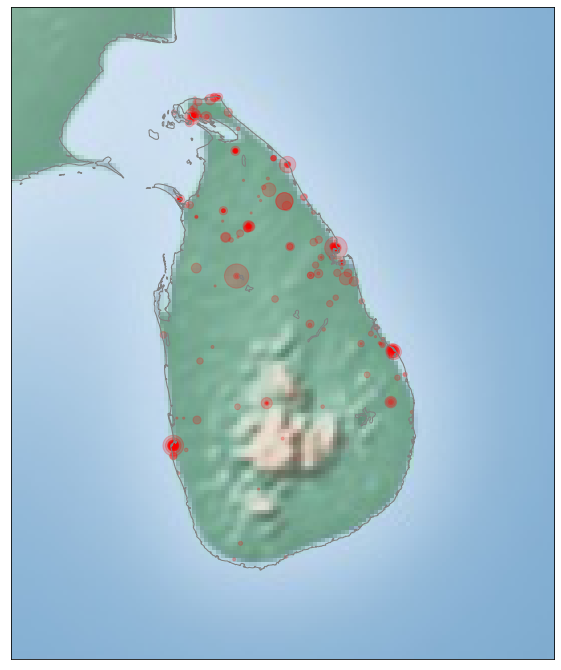

In [8]:
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution='f',
            width=0.5E6, height=0.6E6, 
            lat_0=7.8731, lon_0=80.7718,)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.scatter(lon, lat, latlon=True,
          s=causalities*4+5,
          alpha=0.2,
          c='Red')